In [5]:
import tensorflow as tf

# Loading MNIST Dataset which contains 

# 60000 training samples and 10000 testing samples

# tensorflow already contains MNIST data which can be load using keras

In [2]:
mnist = tf.keras.datasets.mnist ## it is handwritten data of images with 28*28 IMAGE SIZE from 0 - 9

# Now divide the data into train and test datasets


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

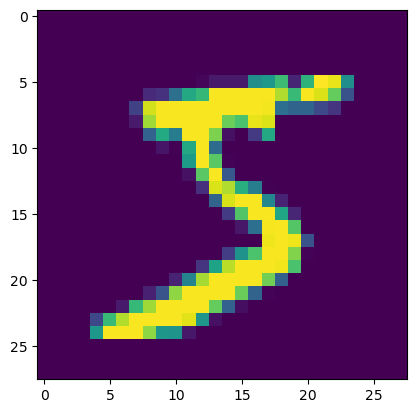

In [8]:
#check the graph how it looks like.
plt.imshow(x_train[0])
plt.show() #to execute graph

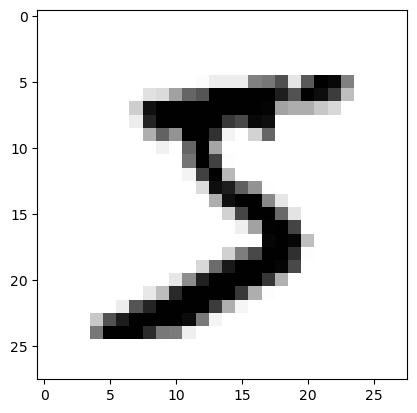

In [9]:
#in order to remove colors and change the configurations.
plt.imshow(x_train[0], cmap = plt.cm.binary) # it show binary image

In [10]:
print (x_train[0]) #check before normalisation

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

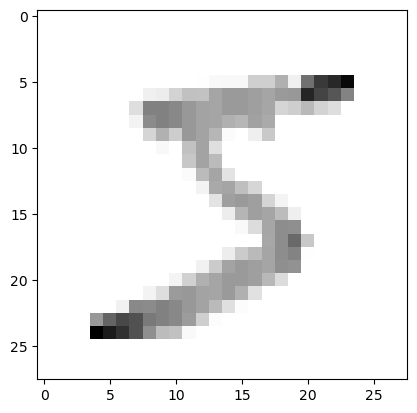

In [11]:
# here the image is in gray color from 0 - 255 so we need to normalise it.
# to noramalise it either we use x_trian/255 or direct by library.
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)


## After normalization

In [12]:
print (x_train[0]) # now all values are from 0 to 1.

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
print (y_train [0]) # ytrain has label(value) and xtrain has data.

5


## Resizing image to make it suitable for convolution oper

In [14]:
# pip install numpy
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### -1 for last index = 60000, 2 dim and inc 1 dim for kernal operation
x_testr = np.array(x_test).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
print("training samples dim ", x_trainr.shape)
print ("testing samples dim " , x_testr.shape)

training samples dim  (60000, 28, 28, 1)
testing samples dim  (10000, 28, 28, 1)


## Now create a deep neural network
## training all data

In [15]:
from tensorflow.keras.models import Sequential # for sequentially connecting deep learning layers(layers are: dense layer , dropout, activation ,flatten).
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [16]:
# create a neural network
model = Sequential()
#1 conversionn layer having 64 diff filters or kernels with (3*3) size    (64000, 28, 28, 1)
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:] )) #only for first time train the model  (28,28,1)
model.add(Activation("relu")) #activaton func to make it non linear if <0 = remove else accept.
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Train
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu")) #activaton func to make it non linear if <0 = remove else accept.
model.add(MaxPooling2D(pool_size=(2,2))) #reduce it upto half

# 3rd Train
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu")) #activaton func to make it non linear if <0 = remove else accept.
model.add(MaxPooling2D(pool_size=(2,2)))

## fully connected layer #1 20*20 = 400
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

## last fully connected layer output must equal to no. of classes = 10
model.add(Dense(10)) # last layer must equal to 10
model.add(Activation('softmax')) #binary classification one neuron in dense layer, sigmoid

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [17]:
print ("total training samples ", len(x_trainr))

total training samples  60000


In [22]:
from tensorflow.keras.optimizers import Adam
# model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])

In [23]:
# model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3) ## training the model
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 51s 37ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0723 - val_accuracy: 0.9803
Epoch 2/5
1313/1313 [==============================] - 44s 33ms/step - loss: 0.0352 - accuracy: 0.9885 - val_loss: 0.0605 - val_accuracy: 0.9819
Epoch 3/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0554 - val_accuracy: 0.9826
Epoch 4/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0662 - val_accuracy: 0.9816
Epoch 5/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0737 - val_accuracy: 0.9802


In [24]:
# evaluating the model on testing data
test_loss, test_acc = model.evaluate(x_testr, y_test)
print ("test loss of  test samples ", test_loss)
print ("Validation accuracy of  test samples ", test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0719 - accuracy: 0.9820
test loss of 10000 data sets  0.07194513827562332
Validation accuracy of 10000 data sets  0.9819999933242798


In [25]:
predictions = model.predict([x_testr]) # store the predictions

313/313 [==============================] - 4s 11ms/step


In [26]:
print(predictions) # prediction containing softmax

[[3.1777037e-10 1.9744786e-07 1.5264750e-07 ... 9.9999964e-01
  1.0174485e-10 3.5104435e-08]
 [6.0196631e-10 1.8014361e-09 1.0000000e+00 ... 3.1601224e-10
  3.7498471e-10 1.6140325e-10]
 [1.7440443e-07 9.9999964e-01 2.3999940e-09 ... 1.5386446e-08
  3.5884035e-08 9.6672956e-08]
 ...
 [5.5838498e-09 3.9437840e-08 3.5515840e-10 ... 6.0597249e-11
  3.5385238e-08 1.0493072e-07]
 [1.6303885e-07 2.0844831e-11 4.7366058e-09 ... 2.4281014e-13
  4.5440524e-06 2.0880225e-07]
 [5.7560192e-05 2.4199479e-11 7.8756239e-05 ... 4.6758158e-10
  7.6606774e-09 1.1591859e-06]]


In [27]:
print(np.argmax(predictions[0])) # check the predicted value 

7


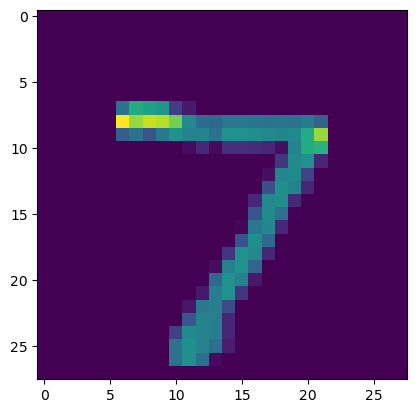

In [29]:
plt.imshow(x_test[0]) # check that answer is right or not

9


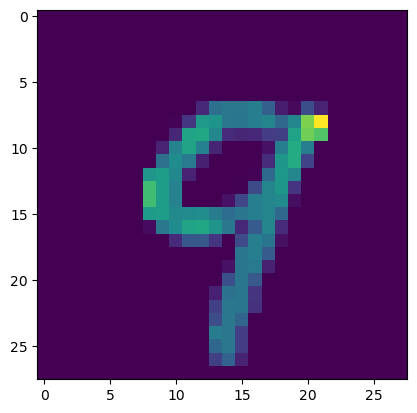

In [30]:
# check at another location
print(np.argmax(predictions[12])) # check the predicted value 
plt.imshow(x_test[12]) # check that answer is right or not

In [39]:
# removing third direction AND CONVERT TO GRAY IMAGE
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [40]:
gray.shape

(581, 580)

In [41]:
resized = cv2.resize(gray , (28,28), interpolation = cv2.INTER_AREA)

In [42]:
resized.shape

(28, 28)

In [43]:
newimg = tf.keras.utils.normalize(resized , axis =1) #scaling from 0 to 1

In [45]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE, IMG_SIZE , 1) # for kernal operation of convolution layer

In [46]:
newimg.shape

(1, 28, 28, 1)

In [53]:
pred = model.predict(newimg)

1/1 [==============================] - 0s 45ms/step


In [55]:
print(np.argmax(pred))

2
